<a href="https://colab.research.google.com/github/kavrit/EDA-Airbnb-booking-analsysis-Capstone-project-1/blob/main/EDA_Airbnb_booking_analysis_capstone_project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>
* **Depending upon the booking, can we segregate the neighborhood among various tires?**
* **What is the exact postal address for the best reviewed hotel?**
* **Which room has the lowest reviews?**
* **Relationship between number of reviews and price ?**



## **Importing required liabraries for Airbnb NYC analysis**

In [1]:
import pandas as pd # for data handling and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# magic function to render graphs/charts in notebook
%matplotlib inline  

In [2]:
#set max columns display limit
pd.set_option("display.max_columns", 35)
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## **Mounting Drive**

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'

 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Airbnb NYC 2019.csv') 
 
df = pd.read_csv('Airbnb NYC 2019.csv')

## **Reading data in colab notebook**

In [4]:
#checking top 5 rows of dataset
Airbnb_NYC_df=df
Airbnb_NYC_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#checking bottom 5 rows of dataset
Airbnb_NYC_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
#Now check information about dataset
Airbnb_NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Inferences.

1) There are total of 48894 entries.

2) Total of 16 columns.

3) There are Null values in number_of_columns

In [7]:
#now check the summary statistics of numerical columns
Airbnb_NYC_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#check the column names 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Check columns and their unique values to understand what they contain**

In [9]:
#create dataframe of numerical columns
numerical_df = df._get_numeric_data()

In [10]:
#create for loop to print unique values in numerical columns

for col in numerical_df:
  print(f'Unique values in numerical columns {col} are: {numerical_df[col].unique()[:5]}')

Unique values in numerical columns id are: [2539 2595 3647 3831 5022]
Unique values in numerical columns host_id are: [2787 2845 4632 4869 7192]
Unique values in numerical columns latitude are: [40.64749 40.75362 40.80902 40.68514 40.79851]
Unique values in numerical columns longitude are: [-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
Unique values in numerical columns price are: [149 225 150  89  80]
Unique values in numerical columns minimum_nights are: [ 1  3 10 45  2]
Unique values in numerical columns number_of_reviews are: [  9  45   0 270  74]
Unique values in numerical columns reviews_per_month are: [0.21 0.38  nan 4.64 0.1 ]
Unique values in numerical columns calculated_host_listings_count are: [6 2 1 4 3]
Unique values in numerical columns availability_365 are: [365 355 194   0 129]


In [11]:
#create categorical column dataframe
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [12]:
df['last_review'].fillna('Not Specified',inplace=True)

Now there are no null values available in our dataset. We can move to next step of data cleaning that is removing duplicates.

## **Step 2 : Removing Duplicate Data**

In [13]:
#let's check shape of our dataset before dropping duplicates
df.shape

(48895, 16)

In [14]:
#now check duplicates
df.duplicated().value_counts()


False    48895
dtype: int64

In [15]:
#create for loop to print unique names in categorical columns
for col in categorical_columns:
  print(f'Unique names in categorical columns {col} are: {categorical_columns[col].unique()[:8]}')

Unique names in categorical columns name are: ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park'
 'Large Cozy 1 BR Apartment In Midtown East' 'BlissArtsSpace!'
 "Large Furnished Room Near B'way "]
Unique names in categorical columns host_name are: ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura' 'Chris' 'Garon'
 'Shunichi']
Unique names in categorical columns neighbourhood_group are: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique names in categorical columns neighbourhood are: ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen"]
Unique names in categorical columns room_type are: ['Private room' 'Entire home/apt' 'Shared room']
Unique names in categorical columns last_review are: ['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19' '2019-06-22'
 '2017-10-05' '2019-0

we checked columns for their unique values some also contains 0 and Null values.

# **Data Cleaning**

Data cleaning is important step in any EDA process as well as it is most time 
consuimg process in entire EDA.

Data cleaning includes following steps.



1.   Handling missing values.
2.   Removing duplicate data.




## **Step 1 : Handling missing values**

In [16]:
#check null values
df.isnull().sum().sort_values(ascending=False)[:5]

reviews_per_month    10052
host_name               21
name                    16
id                       0
host_id                  0
dtype: int64

## **Inferences**



> There are four columns which contain null values name has very less null values (16), but in last review,review_per_month and host_name we have lots of null values. We have to find a way to replace those null values with something meaningfull.



In [17]:
#replace null values of company agent and children with 0
df[['last_review ','reviews_per_month']] = df[['last_review','reviews_per_month']].fillna(0)

Now in last review column we have missing values some people might have not filled data of last review, So we will replace those null values with 'Not Specified'.




In [18]:
df['last_review'].fillna('Not Specified',inplace=True)

Now there are no null values available in our dataset. We can move to next step of data cleaning that is removing duplicates.

## **Step 2 : Removing Duplicate Data**

In [19]:
#let's check shape of our dataset before dropping duplicates
df.shape

(48895, 17)

In [20]:
#now check duplicates
df.duplicated().value_counts()


False    48895
dtype: int64

# **Exploratory Data Analysis**

---



Let's check the correlation between numerical data and create a heatmap.

In [21]:
numerical_df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


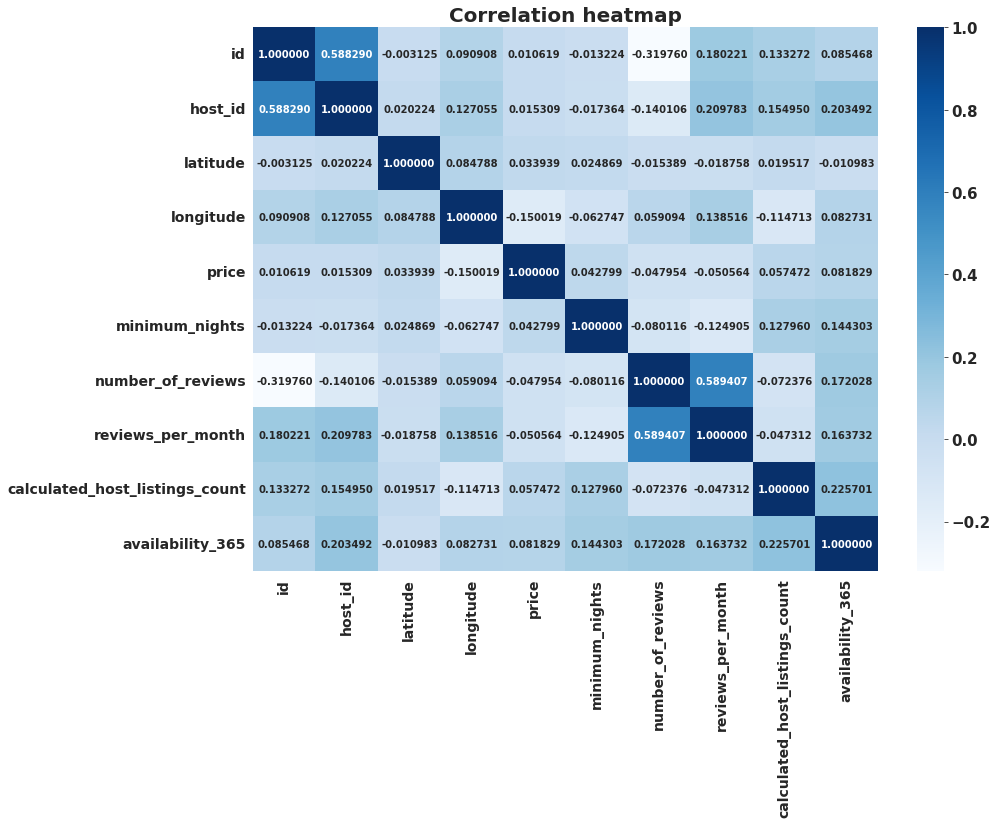

In [22]:
#create heatmap of above correlation matrix so that it is easy to read and understand.
plt.figure(figsize=(14,10))
sns.heatmap(numerical_df.corr(),annot=True,fmt = 'f',cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation heatmap');

# **1) What can we learn about different hosts and areas?**

## **Here We have done a twofold analysis:**

First we have searched for the popular hosts, bsed on the booking

In [23]:
#booking made by host
df1=df[['host_name','neighbourhood_group','calculated_host_listings_count','availability_365']]
nh_grp = df1.groupby(['host_name','neighbourhood_group'])
host=nh_grp.first()
top_host=host.sort_values(by='calculated_host_listings_count', ascending=False)
# Top Hosts
top_host


calculated_host_listings_count  \
host_name     neighbourhood_group                                   
Sonder (NYC)  Manhattan                                       327   
Blueground    Manhattan                                       232   
              Brooklyn                                        232   
Kazuya        Queens                                          103   
              Manhattan                                       103   
...                                                           ...   
Hien          Manhattan                                         1   
Hiershenee B. Manhattan                                         1   
Hifza         Queens                                            1   
Higuemota     Manhattan                                         1   
현선            Manhattan                                         1   

                                   availability_365  
host_name     neighbourhood_group                    
Sonder (NYC)  Manhattan                         309  
Blueground    Manhattan                         156  
              Brooklyn                          349  
Kazuya        Queens                            251  
              Manhattan                         244  
...                                             ...  
Hien          Manhattan                          81  
Hiershenee B. Manhattan                           0  
Hifza         Queens                              0  
Higuemota     Manhattan                         146  
현선            Manhattan                         365  

[15343 rows x 2 columns]

This is the second analysis with respect to neighbourhood

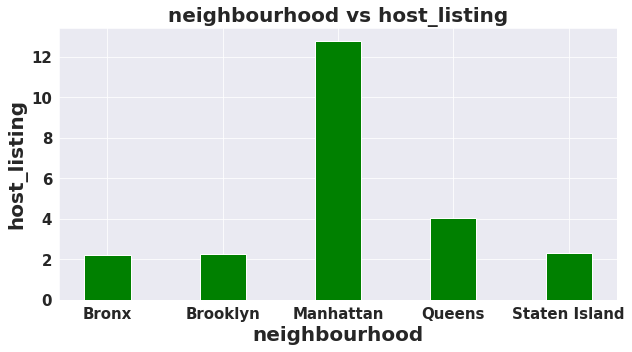

In [24]:
# Time to visualize Neighborhood Groups with respect to Host Listing

a1=df1.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean().reset_index()
ng=a1['neighbourhood_group']
avl=a1['calculated_host_listings_count']
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(ng, avl, color ='green',
        width = 0.4)
 
plt.xlabel("neighbourhood")
plt.ylabel("host_listing")
plt.title("neighbourhood vs host_listing")
plt.show()

So, it’s clear that Manhattan is most preferred by guests, followed by Queens, Staten Island, Brooklyn and Bronx

# **2.	What can we learn from predictions? (ex: locations, prices, reviews, etc)**



1.   **First Analysis is Locationwise Review**


>

*   *Overall (cumulative) review with respect to location*
*   *Average review with respect to location*






2.   **Second analysis is pricewise review**



1.(A) Location wise (cumulative) review

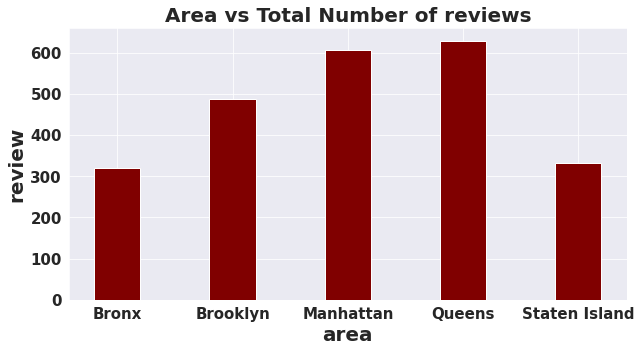

In [25]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
ng1 = areas_reviews['neighbourhood_group']
review1 = areas_reviews['number_of_reviews']
fig = plt.figure(figsize = (10, 5))
 
# VISUALIZATION (creating the bar plot)
plt.bar(ng1, review1, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Total Number of reviews")
plt.show()

1.(B) Location wise (average) review

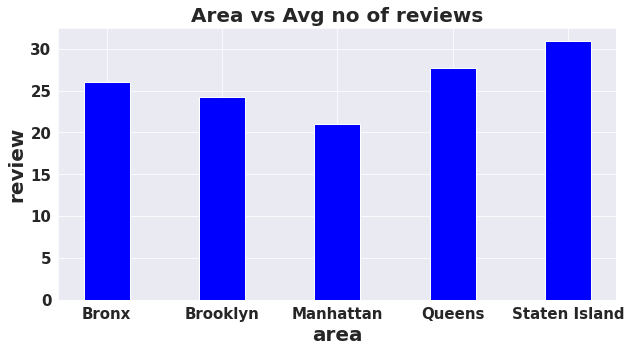

In [26]:
areas_reviews1 = df.groupby(['neighbourhood_group'])['number_of_reviews'].mean().reset_index()
ng2 = areas_reviews1['neighbourhood_group']
review2 = areas_reviews1['number_of_reviews']
fig = plt.figure(figsize = (10, 5))

# VISUALIZATION (creating the bar plot) 
plt.bar(ng2, review2, color ='blue',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Avg no of reviews")
plt.show()

Manhatton area fetched the most no of reviews followed by others. This result perfectly tally with Query 1.

Average review however shows that guests are satisfied with other neighbourhood too. Maybe this is due to the fact that Manhattan has most hosts, thus fetching a high value of total reviewes 

2) Pricewise Review

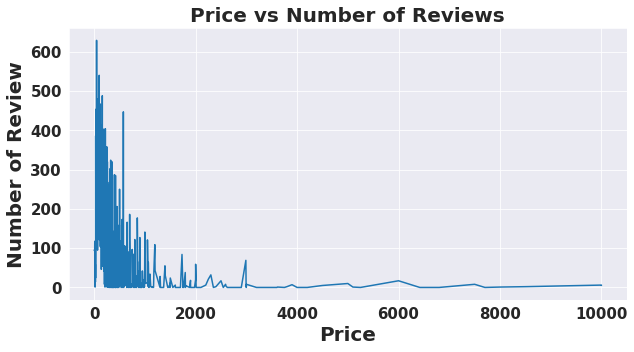

In [27]:
price_review = df.groupby(['price'])['number_of_reviews'].max().reset_index()
area = price_review['price']
price = price_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.plot(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

The above figure shows that hosts, who are charging more, have a very poor review. So the guests generally choose cheaper hosts, which is quite obvious

# **3)Which hosts are the busiest and why?**

In [28]:
busiest_hosts = df.groupby(['host_name', 'host_id', 'room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
print(busiest_hosts)

      host_name   host_id        room_type  number_of_reviews
10279      Dona  47621202     Private room                629
17708        Jj   4734398     Private room                607
25566      Maya  37312959     Private room                543
6235      Carol   2369681     Private room                540
8947   Danielle  26432133     Private room                510
3950        Asa  12949460  Entire home/apt                488
37748     Wanda    792159     Private room                480
22499     Linda   2680820     Private room                474
8625       Dani     42273  Entire home/apt                467
2942     Angela  23591164     Private room                466


In [29]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

In [30]:
fig = plt.figure(figsize = (20,10))

<Figure size 1440x720 with 0 Axes>

plot the bar plot

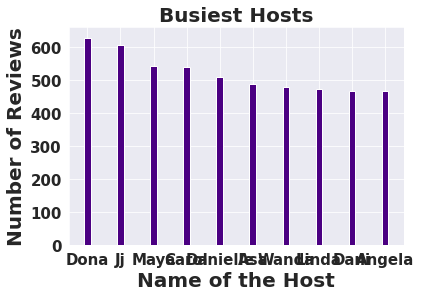

In [31]:
plt.bar(name, reviews, color = 'indigo', width = 0.2)
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

**Inference**

5 MOST BUSIEST HOSTS ARE: DONA,JI, MAYA ,CAROL DANIELLE 
Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

# **4) Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [32]:
traffic_areas = df.groupby(['neighbourhood_group', 'room_type']).count().reset_index() 
 
traffic_areas = traffic_areas.iloc[:15, :3]                                            
traffic_areas= traffic_areas.rename(columns={'id':'minimum_nights'})
traffic_areas = traffic_areas.sort_values(by='minimum_nights',ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


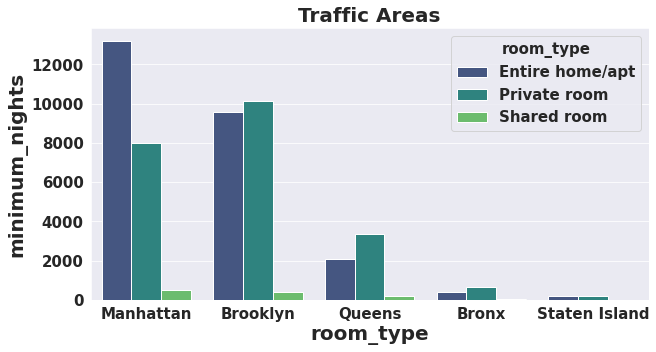

In [33]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group',y='minimum_nights',hue="room_type",data=traffic_areas, palette='viridis')

plt.xlabel('room_type')
plt.ylabel('minimum_nights')
plt.title('Traffic Areas')
plt.show()

People are preferring entire home/apt or private room which are present in Manhattan , Brooklyn, and Queens.

People are preferring listing which are less in price.Now, we can amalgamate Query 2 and Query 4, in order to check how the different room types control review as well as price

# **5) Depending upon the booking, can we segregate the neighborhood among   various tires?**

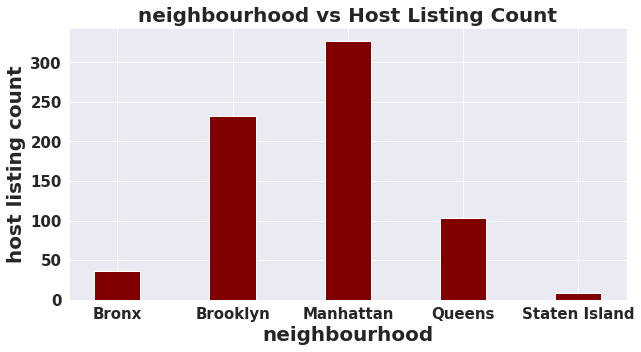

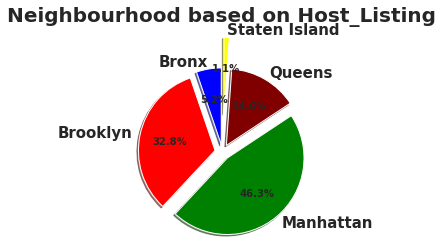

In [34]:

tier_neighbour = df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
tier = tier_neighbour['neighbourhood_group']
host_count = tier_neighbour['calculated_host_listings_count']
fig = plt.figure(figsize = (10, 5))
 
# Bar Plot wise visualization

plt.bar(tier, host_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("neighbourhood")
plt.ylabel("host listing count")
plt.title("neighbourhood vs Host Listing Count")
plt.show()

# Pie Chart wise visualization

labels=tier
colors=['blue','red','green','maroon','yellow']
sizes=host_count
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.5), autopct='%1.1f%%')
plt.title('Neighbourhood based on Host_Listing')

plt.axis('equal')

plt.show()

As depicted from the above figures it is evident that Manhattan is enjoying the maximum host share with a whopping 46.3% of market share, followed by Brooklyn, Queens, Bronx, and Staten Island with 32.8%, 14.6%, 5.2%, and 1.1% of share respectively. 

From these result, it’s evident that Manhattan can be coined as TYRE 1 neighborhood, followed by others as TYRE 2,3,4,5 neighborhood. 


# **6) What is the exact postal address for the best reviewed hotel?**

In [35]:
#Latitude Longitude Mapping

from geopy.geocoders import Nominatim

import pandas as pd

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
add_max_review = df.groupby(['latitude','longitude'])['reviews_per_month'].max().reset_index()
a=add_max_review.sort_values(by='reviews_per_month', ascending=False).head(1)

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# Assign Latitude & Longitude

Latitude =str(a.iloc[0]['latitude'])
Longitude =str(a.iloc[0]['longitude'])
Review =str(a.iloc[0]['reviews_per_month'])
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
print("Review: ", Review)
 
# Get location with geocode
location = geolocator.geocode(Latitude+","+Longitude)
 
# Display location
print("\nLocation of the maximum review is :")
print(location)


Latitude:  40.75918
Longitude:  -73.98801
Review:  58.5

Location of the maximum review is :
726, 8th Avenue, Theater District, Manhattan Community Board 5, New York County, City of New York, New York, 10036, United States


The idea behind this is to cater the premium guest only, who doesn’t bother about price. By using the ‘Google Map’ feature of any smart phone, one can reach the corresponding hotel / host very easily.

# **7) Which room has the lowest reviews?**

In [36]:
#create dataframe for room where the lowest review are generated
df = pd.read_csv('Airbnb NYC 2019.csv')
name_df = df[df['number_of_reviews']<20]
#gruopy name and room_type
name_df=name_df.groupby(['name','room_type','number_of_reviews']).size().reset_index()
name_df = name_df[:10].sort_values(by='number_of_reviews',ascending = False)
name_df

,name,room_type,number_of_reviews,0
4,Studio apartment in Greenpoint,Entire home/apt,17,1
3,Family Friendly Brooklyn House,Entire home/apt,13,1
0,1 Bed Apt in Utopic Williamsburg,Entire home/apt,8,1
1,2-3 bedroom UWS garden triplex,Entire home/apt,4,1
2,AMAZING TIME SQUARE!!BRICK WALLS!!,Entire home/apt,3,1
9,!!!Living&Working. Beautiful Coliving on Flatbush,Shared room,3,1
7,!!! Outpost Coliving . Shared twin room,Shared room,2,1
6,!!! Beautiful private room with backyard.,Private room,1,1
8,!!!Co-Housing taken to the Next Level /Flatbush/2,Shared room,1,1
5,"! ! ! Coliving: live, work, create",Shared room,0,1


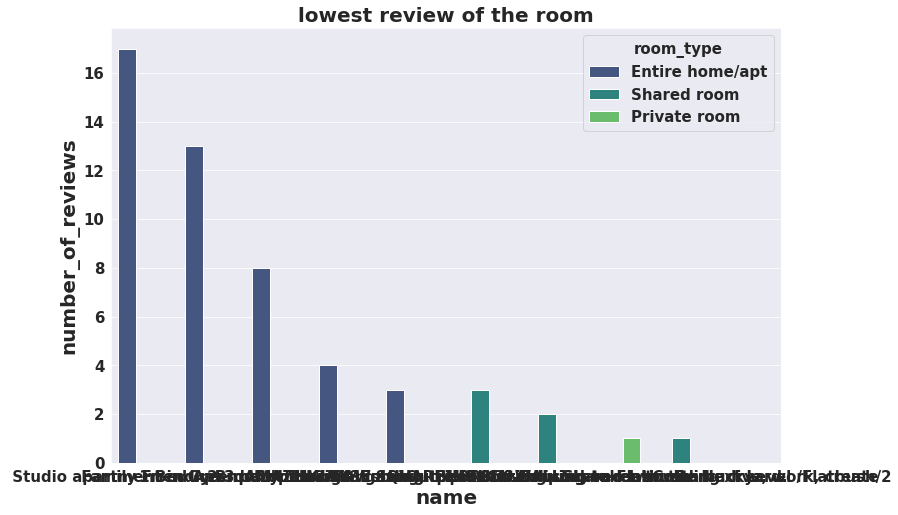

In [37]:
# Visualization
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='number_of_reviews',hue="room_type",data= name_df, palette='viridis')

# set labels
plt.xlabel('name')
plt.ylabel('number_of_reviews')
plt.title('lowest review of the room');

## **8.Relationship between number of reviews and price ?**

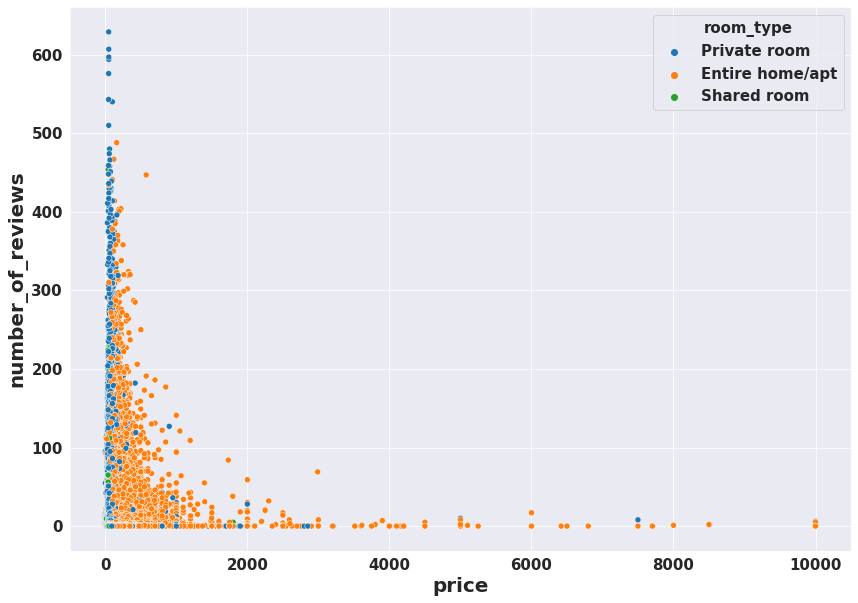

In [38]:
#lets create scatter plot to see relationship between them.
plt.figure(figsize=(14,10))
sns.scatterplot(x=df['price'],y=df['number_of_reviews'],hue=df['room_type']);

In [40]:
#we can see that because of an outlier our scatterplot is looking messy let's remove that outlier and plot again
df.drop(df[df['number_of_reviews'] <100].index, inplace = True)

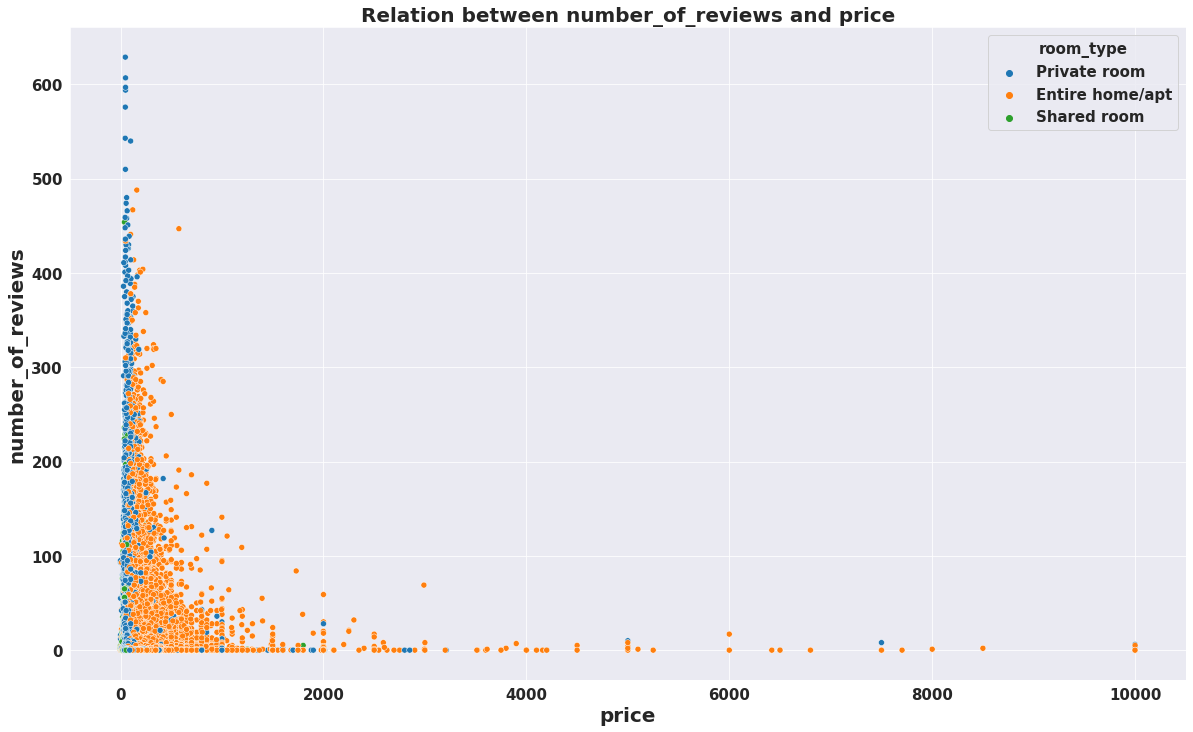

In [39]:
#plot again
plt.figure(figsize=(20,12))
sns.scatterplot(x=df['price'],y=df['number_of_reviews'],hue=df['room_type'])
plt.title('Relation between number_of_reviews and price');

**Interface**

As the price is increasing then number of reviews decreasing so we can say that more price is better dealing with customers.

# **Conclusion** 

1.  Manhattan is most preferred by guests, followed by Queens, Staten Island Brooklyn and Bronx

2.   Average review however shows that guests are satisfied with other neighbourhood too. Maybe this is due to the fact that Manhattan has most hosts, thus fetching a high value of total reviewes
3.   the guests generally choose cheaper hosts, which is quite obvious
4.   People are preferring entire home/apt or private room which are present in Manhattan , Brooklyn, and Queens.
5.  As the price is increasing then number of reviews decreasing so we can say that more price is better dealing with customers.

